In [240]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [241]:
warnings.filterwarnings('ignore')

In [242]:
data = pd.read_csv('/content/r.csv')

In [243]:
data.rename(columns={'Departments ':'departments'},inplace=True)

In [244]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [245]:
data.duplicated().any()

True

In [246]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [247]:
data = data.drop_duplicates()

In [248]:
data.shape

(11991, 10)

In [249]:
14999 - 11991

3008

<Axes: xlabel='left'>

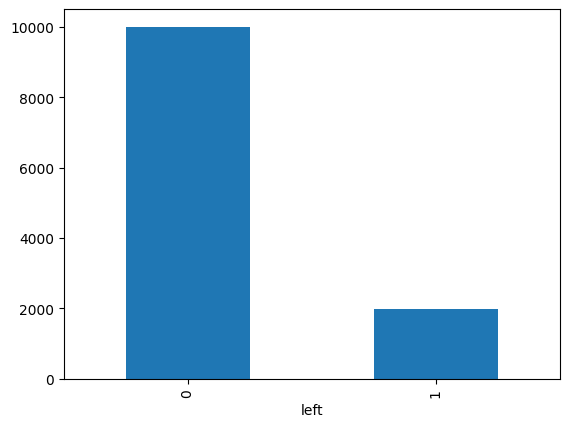

In [250]:
data['left'].value_counts().plot(kind='bar')

In [251]:
X = data.drop(columns=['left'])

In [252]:
y = data['left']

In [253]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])


],remainder='passthrough')

In [254]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())

])

In [255]:
from sklearn import set_config

In [256]:
set_config(display='diagram')

In [257]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [258]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [259]:
y_pred = pipeline.predict(X_test)

In [260]:
accuracy_score(y_test,y_pred)

0.8370154230929554

In [261]:
precision_score(y_test,y_pred)

0.5209580838323353

In [262]:
recall_score(y_test,y_pred)

0.2185929648241206

In [263]:
def model_scorer(model_name,model):

    output=[]

    output.append(model_name)

    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    output.append(accuracy_score(y_test,y_pred))

    output.append(precision_score(y_test,y_pred))

    output.append(recall_score(y_test,y_pred))

    return output

In [264]:
model_dict={
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()

}

In [265]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [266]:
model_output

[['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206],
 ['decision_tree', 0.9699874947894956, 0.893719806763285, 0.9296482412060302],
 ['random_forest', 0.9862442684451855, 0.9892761394101877, 0.9271356783919598],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

In [267]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])


],remainder='passthrough')

In [268]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())

])

In [269]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [270]:
r = pd.DataFrame({
   'satisfaction_level':0.67,
   'last_evaluation':0.93,
    'number_project':2,
    'average_montly_hours':257,
    'time_spend_company':13,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments':'sales',
    'salary':'low'


},index=[0])

In [271]:
result = pipeline.predict(r)

if result == 1:
    print("Employee may leave the company")
else:
    print("Employee may stay with the company")

Employee may stay with the company


In [272]:
import pickle

In [273]:
with open('pl.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [274]:
with open('pl.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [275]:
result = pipeline_saved.predict(r)

if result == 1:
    print("Employee may leave the company")
else:
    print("Employee may not leave the company")

Employee may not leave the company
